In [1252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [1253]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Analyze dataset

In [1254]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [1255]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1256]:
# categorical: survived, sex, embarked
# ordinal: pclass
# continuous: age, sibsp, parch, fare

In [1257]:
print(train_df.isnull().sum())
print('-'*40)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [1258]:
# features with null values in train_df: age, cabin, embarked
# features with null values in test_df: age, fare, cabin

In [1259]:
# unique values per feature
print('Total:', len(train_df))
print('-'*40)
for col in train_df.columns:
    print(col, '\t:', len(train_df[col].unique()))

Total: 891
----------------------------------------
PassengerId 	: 891
Survived 	: 2
Pclass 	: 3
Name 	: 891
Sex 	: 2
Age 	: 89
SibSp 	: 7
Parch 	: 7
Ticket 	: 681
Fare 	: 248
Cabin 	: 148
Embarked 	: 4


In [1260]:
# features that can be used to correlate to survival: 
# sex, pclass, age, sibsp, parch, fare, cabin, embarked

In [1261]:
def bar_chart(feature):
    survived = train_df[train_df['Survived'] == 1][feature].value_counts()
    dead = train_df[train_df['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='barh', figsize=(10,5), title = '{} vs. Survival'.format(feature))

In [1262]:
cat_correlations = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

<Figure size 432x288 with 0 Axes>

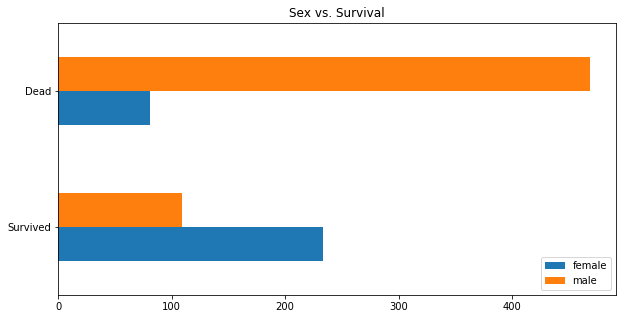

<Figure size 432x288 with 0 Axes>

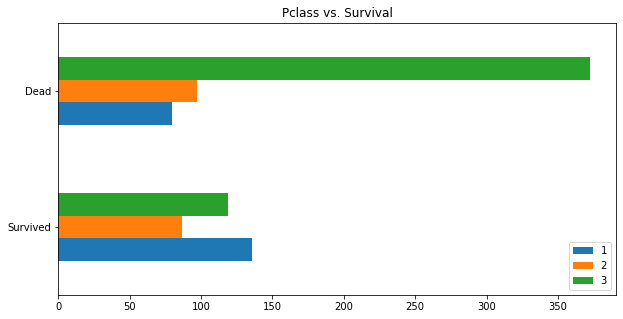

<Figure size 432x288 with 0 Axes>

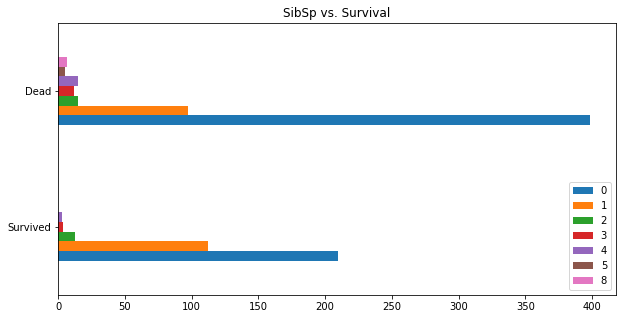

<Figure size 432x288 with 0 Axes>

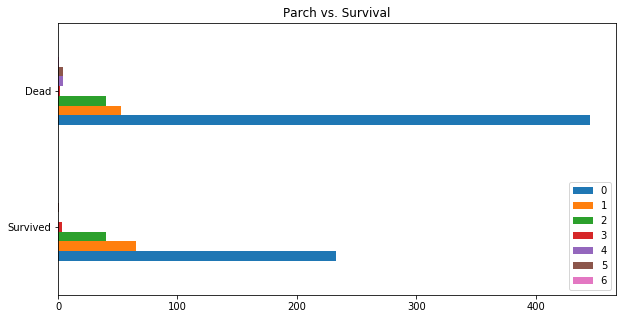

<Figure size 432x288 with 0 Axes>

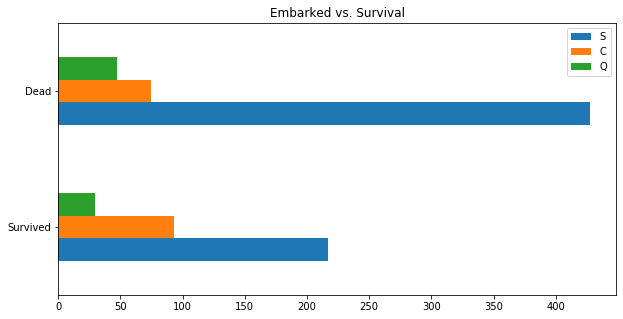

In [1263]:
for cor in cat_correlations:
    plt.figure()
    bar_chart(cor)

# Alter/Fill dataset

In [1264]:
datasets = [train_df, test_df]

## Title

In [1265]:
for df in datasets:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [1266]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Ms            1
Lady          1
Capt          1
Sir           1
Don           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [1267]:
[title for title in train_df['Title'].unique() if title not in ['Mr', 'Ms', 'Mrs']]

['Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [1268]:
for df in datasets:
    df['Title'] = df['Title'].replace('Miss', 'Ms')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace('Mlle', 'Mrs')
    df['Title'] = df['Title'].replace([title for title in train_df['Title'].unique()
                                       if title not in ['Mr', 'Ms', 'Mrs']], 'Others')

In [1269]:
train_df['Title'].value_counts()

Mr        517
Ms        183
Mrs       128
Others     63
Name: Title, dtype: int64

In [1270]:
title_mapping = {title: i for i, title in enumerate(train_df['Title'].unique())}

In [1271]:
title_mapping

{'Mr': 0, 'Mrs': 1, 'Ms': 2, 'Others': 3}

In [1272]:
for df in datasets:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)

In [1273]:
# train_df = train_df.drop(['Name'], axis = 1)
# test_df = test_df.drop(['Name'], axis = 1)

In [1274]:
for df in datasets:
    df.drop(['Name'], axis=1, inplace=True)

In [1275]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,1.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C,0.0
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0.0


## Sex

In [1276]:
sex_mapping = {'male': 0, 'female': 1}

for df in datasets:
    df['Sex'] = df['Sex'].map(sex_mapping)

## Age

In [1277]:
train_df['Age'].isnull().sum(), len(train_df['Age'])

(177, 891)

In [1278]:
# fill missing age with title's median age

for df in datasets:
    df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)

In [1279]:
# generate age range

temp_df = pd.qcut(train_df['Age'], 5)
temp_df.unique()

[(20.0, 26.0], (30.0, 38.0], (26.0, 30.0], (38.0, 80.0], (0.419, 20.0]]
Categories (5, interval[float64]): [(0.419, 20.0] < (20.0, 26.0] < (26.0, 30.0] < (30.0, 38.0] < (38.0, 80.0]]

In [1280]:
for df in datasets:
    df.loc[ df['Age'] <= 20, 'Age' ] = 0
    df.loc[ (df['Age'] > 20) & (df['Age'] <= 26), 'Age' ] = 1
    df.loc[ (df['Age'] > 26) & (df['Age'] <= 30), 'Age' ] = 2
    df.loc[ (df['Age'] > 30) & (df['Age'] <= 38), 'Age' ] = 3
    df.loc[ df['Age'] > 38, 'Age'] = 4

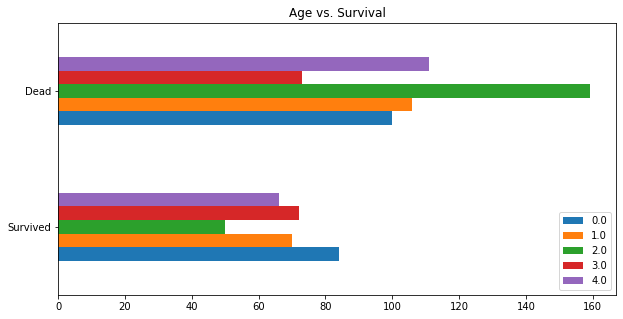

In [1281]:
# matches are assumptions
bar_chart('Age')

## Family Size

In [1282]:
for df in datasets:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

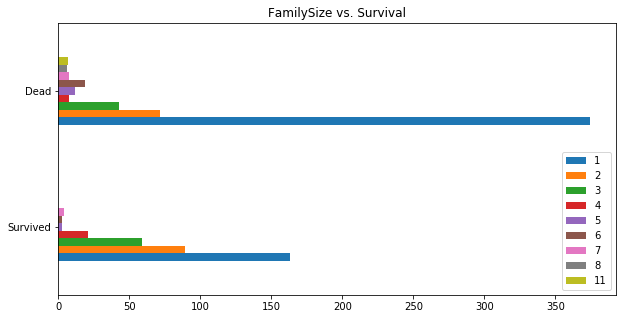

In [1283]:
bar_chart('FamilySize')

In [1284]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4,
                 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

for df in datasets:
    df['FamilySize'] = df['FamilySize'].map(family_mapping)

In [1285]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,1,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0.0
3,4,1,1,1,3.0,1,0,113803,53.1000,C123,S,1,0.4
4,5,0,3,0,3.0,0,0,373450,8.0500,NaN,S,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0,0,211536,13.0000,NaN,S,3,0.0
887,888,1,1,1,0.0,0,0,112053,30.0000,B42,S,2,0.0
888,889,0,3,1,1.0,1,2,W./C. 6607,23.4500,NaN,S,2,1.2
889,890,1,1,0,1.0,0,0,111369,30.0000,C148,C,0,0.0


In [1286]:
for df in datasets:
    df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [1287]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,A/5 21171,7.2500,NaN,S,0,0.4
1,2,1,1,1,3.0,PC 17599,71.2833,C85,C,1,0.4
2,3,1,3,1,1.0,STON/O2. 3101282,7.9250,NaN,S,2,0.0
3,4,1,1,1,3.0,113803,53.1000,C123,S,1,0.4
4,5,0,3,0,3.0,373450,8.0500,NaN,S,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,211536,13.0000,NaN,S,3,0.0
887,888,1,1,1,0.0,112053,30.0000,B42,S,2,0.0
888,889,0,3,1,1.0,W./C. 6607,23.4500,NaN,S,2,1.2
889,890,1,1,0,1.0,111369,30.0000,C148,C,0,0.0


## Embarked

In [1288]:
# take freq port to fill null values

freq_port = train_df['Embarked'].dropna().mode()[0]

train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)

In [1289]:
train_df['Embarked'].isnull().sum(), test_df['Embarked'].isnull().sum()

(0, 0)

In [1290]:
port_mapping = {port: i for i, port in enumerate(train_df['Embarked'].unique())}

for df in datasets:
    df['Embarked'] = df['Embarked'].map(port_mapping)

## Fare

In [1291]:
test_df['Fare'].isnull().sum()

1

In [1292]:
test_df[test_df['Fare'].isnull()][['Pclass', 'Fare']]

,Pclass,Fare
152,3,NaN


In [1293]:
median_class3_fare = np.median(test_df[test_df['Pclass'] == 3]['Fare'].dropna())
median_class3_fare

7.8958

In [1294]:
test_df['Fare'].fillna(median_class3_fare, inplace=True)

In [1295]:
test_df.loc[152]

PassengerId      1044
Pclass              3
Sex                 0
Age                 4
Ticket           3701
Fare           7.8958
Cabin             NaN
Embarked            0
Title               0
FamilySize          0
Name: 152, dtype: object

In [1296]:
# generate fare range

temp_df = pd.qcut(train_df['Fare'], 4)
temp_df.unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [1297]:
for df in datasets:
    df.loc[ df['Fare'] <= 7.91, 'Fare' ] = 0
    df.loc[ (df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare' ] = 1
    df.loc[ (df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare' ] = 2
    df.loc[ df['Fare'] > 31, 'Fare' ] = 3

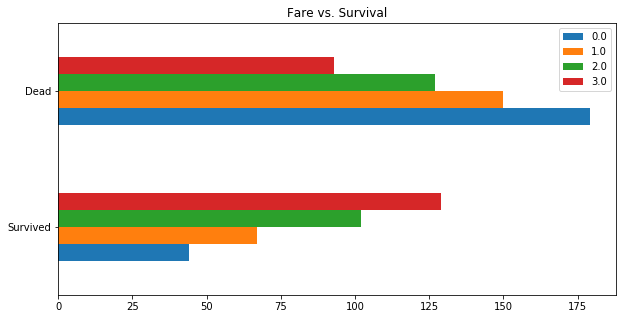

In [1298]:
bar_chart('Fare')

In [1299]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,A/5 21171,0.0,NaN,0,0,0.4
1,2,1,1,1,3.0,PC 17599,3.0,C85,1,1,0.4
2,3,1,3,1,1.0,STON/O2. 3101282,1.0,NaN,0,2,0.0
3,4,1,1,1,3.0,113803,3.0,C123,0,1,0.4
4,5,0,3,0,3.0,373450,1.0,NaN,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,211536,1.0,NaN,0,3,0.0
887,888,1,1,1,0.0,112053,2.0,B42,0,2,0.0
888,889,0,3,1,1.0,W./C. 6607,2.0,NaN,0,2,1.2
889,890,1,1,0,1.0,111369,2.0,C148,1,0,0.0


In [1300]:
test_df

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,3.0,330911,0.0,NaN,2,0.0,0.0
1,893,3,1,4.0,363272,0.0,NaN,0,1.0,0.4
2,894,2,0,4.0,240276,1.0,NaN,2,0.0,0.0
3,895,3,0,2.0,315154,1.0,NaN,0,0.0,0.0
4,896,3,1,1.0,3101298,1.0,NaN,0,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,A.5. 3236,1.0,NaN,0,0.0,0.0
414,1306,1,1,4.0,PC 17758,3.0,C105,1,0.0,0.0
415,1307,3,0,4.0,SOTON/O.Q. 3101262,0.0,NaN,0,0.0,0.0
416,1308,3,0,2.0,359309,1.0,NaN,0,0.0,0.0


### Drop unnecessary data

In [1301]:
for df in datasets:
    df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [1302]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,0,0,0.4
1,2,1,1,1,3.0,3.0,1,1,0.4
2,3,1,3,1,1.0,1.0,0,2,0.0
3,4,1,1,1,3.0,3.0,0,1,0.4
4,5,0,3,0,3.0,1.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,1.0,0,3,0.0
887,888,1,1,1,0.0,2.0,0,2,0.0
888,889,0,3,1,1.0,2.0,0,2,1.2
889,890,1,1,0,1.0,2.0,1,0,0.0


In [1303]:
test_df

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,3.0,0.0,2,0.0,0.0
1,893,3,1,4.0,0.0,0,1.0,0.4
2,894,2,0,4.0,1.0,2,0.0,0.0
3,895,3,0,2.0,1.0,0,0.0,0.0
4,896,3,1,1.0,1.0,0,1.0,0.8
...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,1.0,0,0.0,0.0
414,1306,1,1,4.0,3.0,1,0.0,0.0
415,1307,3,0,4.0,0.0,0,0.0,0.0
416,1308,3,0,2.0,1.0,0,0.0,0.0


# Classify data

In [1304]:
train_x = train_df.drop(['Survived', 'PassengerId'], axis=1)
train_y = train_df['Survived']
test_x = test_df.drop(['PassengerId'], axis=1).copy()

train_x.shape, train_y.shape, test_x.shape

((891, 7), (891,), (418, 7))

In [1307]:
train_x

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0,0,0.4
1,1,1,3.0,3.0,1,1,0.4
2,3,1,1.0,1.0,0,2,0.0
3,1,1,3.0,3.0,0,1,0.4
4,3,0,3.0,1.0,0,0,0.0
...,...,...,...,...,...,...,...
886,2,0,2.0,1.0,0,3,0.0
887,1,1,0.0,2.0,0,2,0.0
888,3,1,1.0,2.0,0,2,1.2
889,1,0,1.0,2.0,1,0,0.0


## Cross-validation (K-fold)

In [1308]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## Choosing classifier

In [1309]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression

In [1310]:
clf = LogisticRegression(max_iter=1000)
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# score
round(np.mean(score)*100, 2)

78.9

### Gaussian Naive Bayes

In [1311]:
clf = GaussianNB()
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# score
round(np.mean(score)*100, 2)

80.25

### Classification Tree

In [1312]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# score
round(np.mean(score)*100, 2)

79.35

### k-Nearest Neighbor

In [1313]:
clf = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# score
round(np.mean(score)*100, 2)

78.01

### SVM

In [1314]:
clf = SVC()
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring='accuracy')

# score
round(np.mean(score)*100, 2)

82.38

In [1315]:
# will be using svm as classifier
# since it has the best score

In [1316]:
lgst = LogisticRegression(max_iter=1000)
lgst.fit(train_x, train_y)
pred = lgst.predict(test_x)

In [1317]:
final = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': pred
})

final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
